In [ ]:
import pandas as pd
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns


MODEL_DIR = r"E:\ML proj\Models"
TEST_DATA_PATH = r"E:\ML proj\Data\test_data.csv"
OUTPUT_CSV = os.path.join(MODEL_DIR, "test_predictions_final.csv")

print("Loading models")

model = joblib.load(os.path.join(MODEL_DIR, "district_model.pkl"))
features = joblib.load(os.path.join(MODEL_DIR, "district_features.pkl"))
scaler = joblib.load(os.path.join(MODEL_DIR, "scaler.pkl"))

imputer_path = os.path.join(MODEL_DIR, "imputer.pkl")
if os.path.exists(imputer_path):
    imputer = joblib.load(imputer_path)
    use_imputer = True
    print("Imputer loaded.")
else:
    use_imputer = False
    print("No imputer found. Proceeding without imputation.")

print(f"Features: {features}")
print("Model and scaler loaded successfully.\n")

print("Loading test data...")
test_df = pd.read_csv(TEST_DATA_PATH)

test_df['MSME_Density'] = test_df['total'] / 1000
test_df['Micro_Ratio'] = test_df['micro'] / test_df['total'].replace(0, 1)
test_df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

X_test = test_df[features].copy()

if use_imputer:
    print("Applying imputation...")
    X_test_imputed = imputer.transform(X_test)
    X_test_scaled = scaler.transform(X_test_imputed)
else:
    print("Skipping imputation...")
    X_test_scaled = scaler.transform(X_test)

print(f"Test data ready: {X_test_scaled.shape}\n")

print("Making predictions...")
test_df['Predicted_Performance'] = model.predict(X_test_scaled)
test_df['Performance_Probability'] = model.predict_proba(X_test_scaled)[:, 2]  
test_df['Performance_Label'] = test_df['Predicted_Performance'].map({
    0: 'Low', 1: 'Medium', 2: 'High'
})

Loading model and artifacts...
No imputer found. Proceeding without imputation.
Features: ['MSME_Density', 'Micro_Ratio', 'small', 'medium']
Model and scaler loaded successfully.

Loading test data...
Skipping imputation...
Test data ready: (785, 4)

Making predictions...


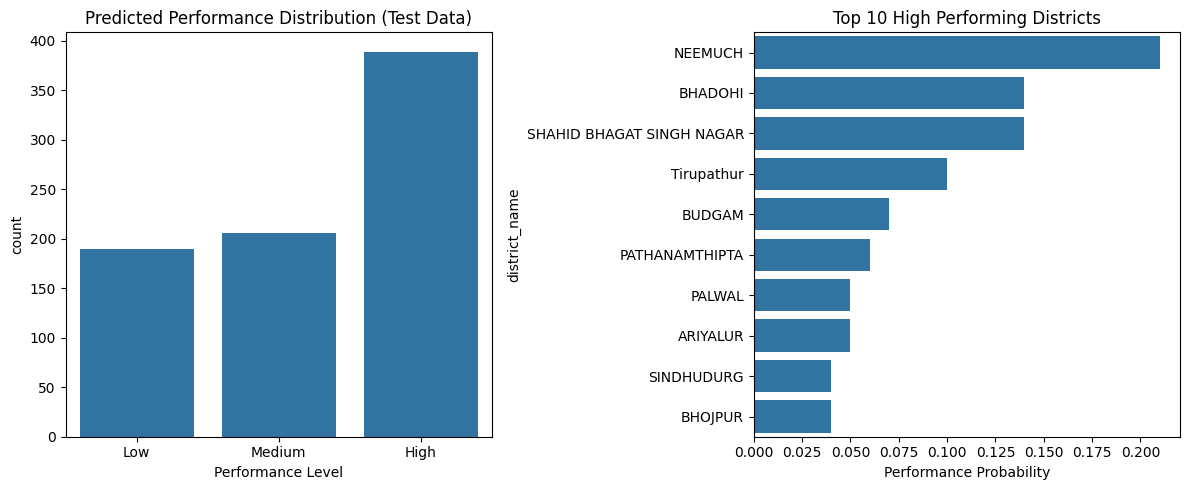


Test visualization saved to: E:\ML proj\Models\test_predictions_visualization.png

SUMMARY
Accuracy: 0.9635
Test Districts Analyzed: 785
High Performing Districts: 389
Medium Performing: 206
Low Performing: 190

All artifacts saved in: E:\ML proj\Models


In [ ]:
# 9. TEST VISUALIZATION
plt.figure(figsize=(12, 5))

# Plot 1: Performance Distribution in Test Data
plt.subplot(1, 2, 1)
sns.countplot(data=test_df, x='Performance_Label', order=['Low', 'Medium', 'High'])
plt.title('Predicted Performance Distribution (Test Data)')
plt.xlabel('Performance Level')

# Plot 2: Top 10 High Performing Districts
plt.subplot(1, 2, 2)
high_performing = test_df[test_df['Predicted_Performance'] == 2].nlargest(10, 'Performance_Probability')
sns.barplot(data=high_performing, y='district_name', x='Performance_Probability')
plt.title('Top 10 High Performing Districts')
plt.xlabel('Performance Probability')

plt.tight_layout()
plt.savefig(os.path.join(MODEL_DIR, 'test_predictions_visualization.png'), dpi=300, bbox_inches='tight')
plt.show()

print(f"\nTest visualization saved to: {os.path.join(MODEL_DIR, 'test_predictions_visualization.png')}")
# 10. SUMMARY
print("\n" + "="*50)
print("SUMMARY")
print("="*50)
print(f"Accuracy: {accuracy:.4f}")
print(f"Test Districts Analyzed: {len(test_df)}")
print(f"High Performing Districts: {len(test_df[test_df['Predicted_Performance'] == 2])}")
print(f"Medium Performing: {len(test_df[test_df['Predicted_Performance'] == 1])}")
print(f"Low Performing: {len(test_df[test_df['Predicted_Performance'] == 0])}")
print("\nAll artifacts saved in:", MODEL_DIR)
print("="*50)